<h1> Tips Example </h1>

<h3> Input </h3>
Service: what value would you give for the service, on a sacale of 0 to 10?

<li> bad, good, verry good </li>

Quality of food: how goos was the food, on a scale of 0 to 10?

<li> bad, good, verry good </li>

<h3> Output </h3>
 Tips: how much tips would you give, between 0% to 20%?

 <li> low, ok, higth

 <h3> Rules <h3>
<li> If the quality of the food was bad or the service was bad, so the tip will be low </li>
<li> If the service was medium, so the tip will be medium </li>  
<li> If the service was good and the quality of food was good, so the tip will be higth </li>  


<h2> Instaling and Importing Libraries


In [1]:
!pip install scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894074 sha256=1c4c29bf2a28bf4151c63853bb3cde857afcf826d8dfd87a7a8703fac91113d7
  Stored in directory: c:\users\lsmaa\appdata\local\pip\cache\wheels\2c\04\80\7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [1]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl

<h2> Antecedent and Consequent

In [2]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

tip = ctrl.Consequent(np.arange(0, 21, 1), 'tip')




<h2> Membership Functions

In [3]:
quality.automf(number=3, names=['bad', 'good', 'verry good'])
service.automf(number=3, names=['bad', 'good', 'verry good'])


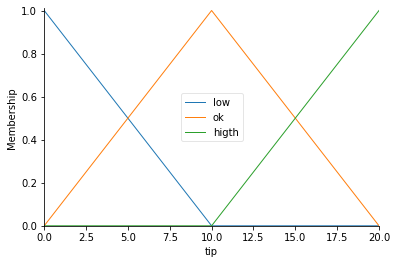

In [4]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 10])
tip['ok'] = fuzz.trimf(tip.universe, [0, 10, 20])
tip['higth'] = fuzz.trimf(tip.universe, [10, 20, 20])

tip.view()

In [6]:
rule_one = ctrl.Rule(quality['bad'] | service['bad'], tip['low'])
rule_two = ctrl.Rule(quality['good'], tip['ok'])
rule_tree = ctrl.Rule(service['verry good'] | quality['verry good'], tip['higth'])

<h2> Control System

In [7]:
control_system = ctrl.ControlSystem([rule_one, rule_two, rule_tree])

In [8]:
system = ctrl.ControlSystemSimulation(control_system)

In [14]:
system.input['quality'] = 10
system.input['service'] = 2

system.compute()

11.177607698816173


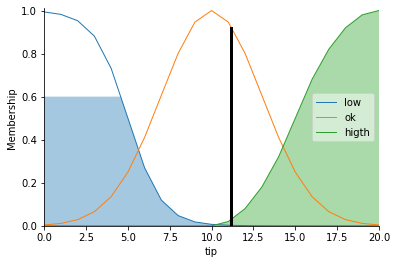

In [15]:
print(system.output['tip'])
tip.view(sim = system)

<h2> Task </h2>

Testing another fuzzy types

In [4]:
tip['low'] = fuzz.sigmf(tip.universe, 5, -1)
tip['ok'] = fuzz.gaussmf(tip.universe, 10, 3)
tip['higth'] = fuzz.pimf(tip.universe, 10, 20, 20, 21)

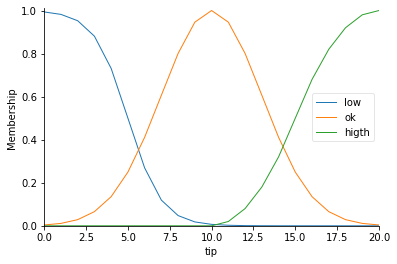

In [5]:
tip.view()